In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("../../output/current_values.csv", index_col=0)

/Users/jsusser/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [59]:
df = df.rename({'1digit industry':"ind"}, axis=1)
df=df.reset_index(drop=True)
df.head()

,Year,3digit occupation,2digit occupation,1digit occupation,Age,Asecwt,Exp,Male,Female,White,Exp2,ind,Big_firm,Education,a,Wage
0,1976,184,3,1,28,632,8,1,0,1,64,1,0,90,1280,12.64
1,1976,315,6,2,32,753,12,0,1,1,144,1,0,90,900,11.47
2,1976,254,5,2,28,741,8,1,0,1,64,1,0,90,2080,7.07
3,1976,386,6,2,29,699,9,0,1,1,81,4,0,90,2184,14.54
4,1976,270,5,2,36,797,16,1,0,1,256,1,0,90,2444,10.95


In [97]:
import statsmodels.formula.api as smf
k=100000
#df = df[(df["Wage"]<20)&(df["Annual hours"]<3000)]
df2=df.drop(range(k),axis=0)
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Wage ~ ind', data=df2)
model = model.fit()
model.params

Intercept    10.269817
ind           0.655107
dtype: float64

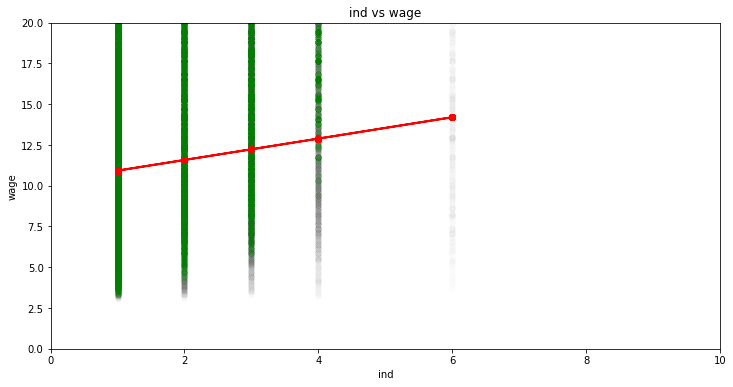

In [108]:
df3 = df.iloc[:k]
predictions = model.predict(df3["ind"])

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(df3['ind'], df3['Wage'], 'go', alpha=0.002)           # scatter plot showing actual data
plt.plot(df3['ind'], predictions, 'r', marker='o',linewidth=2)   # regression line
plt.xlabel('ind')
plt.ylabel('wage')
plt.title('ind vs wage')
plt.axis([0, 10,0, 20])
plt.show()

In [103]:
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2_score(df3['Wage'], predictions)



0.030993322318398242

In [104]:
predictions = model.predict(df3)
predictions

0        10.924924
1        10.924924
2        10.924924
3        12.890246
4        10.924924
5        10.924924
6        10.924924
7        10.924924
8        10.924924
9        10.924924
10       11.580031
11       10.924924
12       10.924924
13       12.235138
14       12.235138
15       11.580031
16       12.235138
17       11.580031
18       12.235138
19       11.580031
20       10.924924
21       12.235138
22       10.924924
23       10.924924
24       10.924924
25       12.235138
26       10.924924
27       10.924924
28       10.924924
29       10.924924
           ...    
99970    11.580031
99971    10.924924
99972    11.580031
99973    10.924924
99974    12.235138
99975    12.890246
99976    10.924924
99977    10.924924
99978    10.924924
99979    10.924924
99980    10.924924
99981    10.924924
99982    12.890246
99983    10.924924
99984    10.924924
99985    12.890246
99986    10.924924
99987    10.924924
99988    10.924924
99989    10.924924
99990    11.580031
99991    10.